In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
data = pd.read_csv("/content/flavors_cacao.csv")

In [4]:
data.head()

,REF,Company (Manufacturer),Company Location,Review Date,Country of Bean Origin,Specific Bean Origin or Bar Name,Cocoa Percent,Ingredients,Most Memorable Characteristics,Rating
0,2542,5150,U.S.A.,2021,India,"Anamalai, batch 1",0.68,"3- B,S,C","milk brownie, macadamia,chewy",3.50
1,2546,5150,U.S.A.,2021,Uganda,"Semuliki Forest, batch 1",0.8,"3- B,S,C","mildly bitter, basic cocoa, fatty",3.25
2,2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",0.68,"3- B,S,C","chewy, off, rubbery",3.00
3,2546,5150,U.S.A.,2021,Venezuela,"Sur del Lago, batch 1",0.72,"3- B,S,C","fatty, earthy, moss, nutty,chalky",3.00
4,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",0.76,"3- B,S,C","cocoa, blackberry, full body",3.75


# Veri setini inceleyelim

In [5]:
def check_data(df, row_num=5):
    print("--------------- Dataset Shape ---------------")
    print("No. of Rows:", df.shape[0], "\nNo. of Columns:", df.shape[1])
    print("--------------- Dataset Information ---------------")
    print(df.info())
    print("--------------- Types of Columns ---------------")
    print(df.dtypes)
    print(f"--------------- First {row_num} Rows ---------------")
    print(df.head(row_num))
    print(f"--------------- Last {row_num} Rows ---------------")
    print(df.tail(row_num))
    print("--------------- Summary Statistics of The Dataset ---------------")
    print(df.describe().T)
    print("--------------- Dataset Missing Values Analysis ---------------")
    print(df.isnull().sum())

In [6]:
check_data(data)

--------------- Dataset Shape ---------------
No. of Rows: 2632 
No. of Columns: 10
--------------- Dataset Information ---------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2632 entries, 0 to 2631
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   REF                               2632 non-null   int64  
 1   Company (Manufacturer)            2632 non-null   object 
 2   Company Location                  2632 non-null   object 
 3   Review Date                       2632 non-null   int64  
 4   Country of Bean Origin            2632 non-null   object 
 5   Specific Bean Origin or Bar Name  2632 non-null   object 
 6   Cocoa Percent                     2632 non-null   object 
 7   Ingredients                       2632 non-null   object 
 8   Most Memorable Characteristics    2632 non-null   object 
 9   Rating                            2632 non-null   float64
d

1. Ülkelerin (şirketin lokasyonuna göre) sahip olduğu şirket sayılarını bulunuz.

In [7]:
company_sm = data.groupby("Company Location").nunique()["Company (Manufacturer)"].sort_values(ascending=False)
company_sm.head(10)

Company Location
U.S.A.       261
Canada        32
U.K.          30
France        29
Ecuador       17
Belgium       16
Italy         13
Japan         12
Australia     12
Peru          11
Name: Company (Manufacturer), dtype: int64

2. Ülkelerin (şirketin lokasyonuna göre) sahip olduğu bar sayılarını bulunuz.


In [8]:
company_bar =  data.groupby("Company Location").count()["Specific Bean Origin or Bar Name"].sort_values(ascending=False)
company_bar.head(10)

Company Location
U.S.A.         1193
France          186
Canada          178
U.K.            135
Italy            83
Belgium          72
Ecuador          58
Australia        53
Switzerland      44
Germany          43
Name: Specific Bean Origin or Bar Name, dtype: int64

3. Ülke kökenine göre ortalama puanı hesaplayınız?

In [20]:
#data.groupby("Country of Bean Origin").mean()["Rating"].sort_values(ascending=False).head() # En yüksek puanı alandan en aza alana sıralar
mean_rating = data.groupby(["Country of Bean Origin"]).mean(numeric_only=True)["Rating"]
mean_rating.head(10)

Country of Bean Origin
Australia    3.250000
Bali         2.500000
Belize       3.243827
Blend        3.038462
Bolivia      3.171687
Brazil       3.262346
Burma        3.000000
Cameroon     2.875000
China        3.500000
Colombia     3.207317
Name: Rating, dtype: float64

4. En fazla inceleme hangi yılda yapılmıştır?


In [10]:
review_max = data["Review Date"].value_counts()[data['Review Date'].value_counts() == data['Review Date'].value_counts().max()]
review_max

2015    284
Name: Review Date, dtype: int64

5. En az inceleme hangi yılda yapılmıştır?

In [11]:
review_min =  data["Review Date"].value_counts()[data['Review Date'].value_counts() == data['Review Date'].value_counts().min()]
review_min

2006    62
Name: Review Date, dtype: int64

6. Kakao çekirdeğinin kökeni kalitenin bir göstergesi midir?

In [12]:
data['Cocoa Percent'] = data['Cocoa Percent'].str.replace('%', '').astype(float)

In [13]:
cacao_rating = data.groupby('Country of Bean Origin')['Rating'].max().nlargest(10).index
percent_rating = data.groupby('Country of Bean Origin')['Cocoa Percent'].max().loc[cacao_rating].sort_values(ascending=False)
percent_rating

Country of Bean Origin
Blend                 73.50
Dominican Republic    72.50
Ecuador               72.50
Belize                 0.90
Bolivia                0.90
Colombia               0.88
Brazil                 0.85
Ghana                  0.85
Costa Rica             0.82
Guatemala              0.82
Name: Cocoa Percent, dtype: float64

In [14]:
percent_mean = data.groupby('Country of Bean Origin')['Cocoa Percent'].max().nlargest(10).index
rating_percent = data.groupby('Country of Bean Origin')['Rating'].max().loc[cacao_rating].sort_values(ascending=False)
rating_percent

Country of Bean Origin
Belize                4.0
Blend                 4.0
Bolivia               4.0
Brazil                4.0
Colombia              4.0
Costa Rica            4.0
Dominican Republic    4.0
Ecuador               4.0
Ghana                 4.0
Guatemala             4.0
Name: Rating, dtype: float64

7. Kakao çekirdekleri genellikle nerelerden gelmektedir?

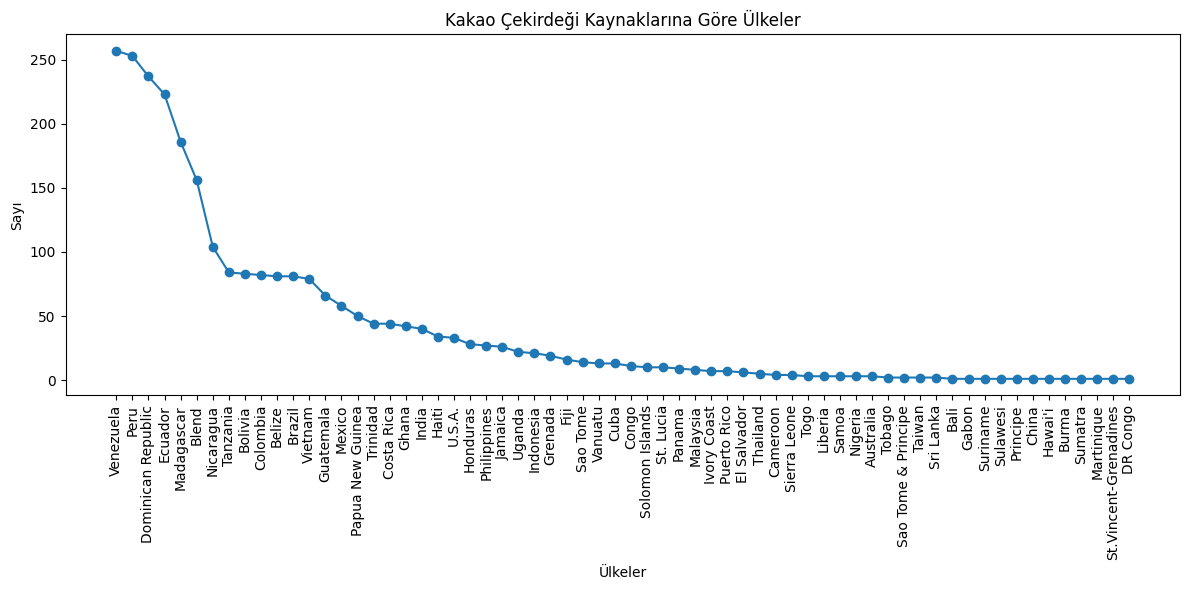

In [15]:
bean_count = data["Country of Bean Origin"].value_counts()

plt.figure(figsize=(12, 6))
bean_count.plot(kind="line", marker="o", linestyle="-")
plt.title("Kakao Çekirdeği Kaynaklarına Göre Ülkeler")
plt.xlabel("Ülkeler")
plt.ylabel("Sayı")
plt.xticks(range(len(bean_count)), bean_count.index, rotation=90)
plt.tight_layout()
plt.show()

Kakao çekirdeklerinin genellikle Venezuela, Peru, Dominik Cumhuriyeti, Ekvador ve Madagaskar geldiğini söyleyebiliriz.

8. Araştırmanız bazı tüketicilerin lesitin içeren barlardan kaçınmak istediğini gösteriyor. Lesitin içeren ve
içermeyen barların ortalama puanını karşılaştırın (İçerikte "L" olanlar).

In [16]:
in_lecithin = data[data["Ingredients"].str.contains("L", na=False)]
non_lecithin = data[~data["Ingredients"].str.contains("L", na=False)]

inLecithin_rating = in_lecithin["Rating"].mean()
nonLecithin_rating = non_lecithin["Rating"].mean()

print(inLecithin_rating)
print(nonLecithin_rating)

3.152
3.2094277673545966


Lesitin içermeyen barların ortalama puanı daha yüksek olduğu görülmüştür.

9. Ortalama reytingi en yüksek ve en düşük çekirdek orijini olan ülkeler hangileridir?

In [21]:
ratingmax_bean = data.groupby("Country of Bean Origin").mean(numeric_only=True)["Rating"].sort_values(ascending=False).head()
ratingmax_bean

Country of Bean Origin
Hawai'i                3.750
Tobago                 3.625
China                  3.500
Sao Tome & Principe    3.500
Solomon Islands        3.450
Name: Rating, dtype: float64

In [22]:
ratingmin_bean = data.groupby("Country of Bean Origin").mean(numeric_only=True)["Rating"].sort_values(ascending=False).tail()
ratingmin_bean

Country of Bean Origin
St.Vincent-Grenadines    2.750000
Sierra Leone             2.750000
Principe                 2.750000
Puerto Rico              2.714286
Bali                     2.500000
Name: Rating, dtype: float64

10. Bulgularınızı özetleyin.

Bu verisetine göre Kakao çekirdeklerinin en çok geldiği 3 ülke Venezuela, Peru, Dominik Cumhuriyeti olduğu görülmüştür. Kakao içeriği en fazla olan ve ortalama puanı en yüksek olan Belize, Bolivia, Colombia'dır. Bu bulduğumuz üç ülkenin kakao çekirdeklerine daha kaliteli diyebiliriz. Orta Amerika, Güney Amerika ve çevresinde olan adalardan gelen kakao çekirdekleri genellikle yüksek puana sahip olduğunu söyleyebiliriz. En fazla 284 ile 2015 yılında, en az ise 62 ile 2006 yılında inceleme yapıldığı görülmüştür. Bu incelemelerde ise içerisinde lesitin içeren barların ortalama puanı lesitin içermeyen ortalama puanından düşük olduğu tespit edilmiş dolayısıyla kullanıcıların çoğunlukla lesitin içermeyen çikolata barlarına daha yüksek puanlamalar yaptığını söyleyebiliriz.